<a id = "1"></a>
<div>
    <div style='float:left; width:55%; overflow:hidden'>
        <br><br><br><br>
        <span style = "float:right;">
        <h1><strong><span style='color:#17202a'> Forecasting and Time Series Analysis 📈 - LSTM 💥🔥 </span></strong></h1>
        <h3><b><span style="color:#273746"> Share Market Forecasting live data </span></b></h3> 
        <p><span style="color:#566573"> By Piyush Mahajan </span></p>
        <br>
        <b></b>
    </div>
    <div style="float:rigth; width:40%; max-height:300px; overflow: hidden;">
        <img src = 'https://i.pinimg.com/originals/65/56/d1/6556d1f996900f1b315db64ae955d524.png' width = '500px' height='300px'>
    </div>
</div>

**Hello Guys 🖐**

This is Simple Starter Notebook for **Share market forecasting using LSTM**. 

- The Purpose of this Project/Notebook is to help Invester in investing money in stock market (especially me 😅). 

- In This Notebook, I am Using yahoo finance library to extract 5 years of share market data of **TATAMOTORS** company (India) and for visualization purpose I am extensively using plotly because of its interactive plots.

- I am using 5 years **day-wise** data for building lstm, extracted from date 08-03-2017 to 02-03-2022

- If you are starting to learn Time Series data and model building, I hope this notebook will help you.

> **NOTE** I am using two libraries yfinance and yahoofinancials just because to explore 🚵‍♀️, you can use any one of them.

**<h3><span style="color: #f08ec9 ">About Dataset: </span></h3>**

1. **Open** - It is a Opening price of stock at that date.

2. **High** - The highest price reached by stock at that day.
3. **Low**- The Lowest price reached by stock at that day.
4. **Close** - It is the Closing price of stock that is, Price of stock at closing time of share market.
5. **Volume** - It is the total number of shares exchanged at that day. 

I am not going to used other two columns but they may be useful in forecasting but i am going to ignore them.

<a id='2'></a>
# <span style= "color: #5494ff " id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [Introduction](#1)
- [Table of Content](#2)
- [1. Libraries](#3)
- [2. Importing and Creation of dataset](#4)
- [3. Exploring dataset and Visualization](#5)
    - [3.1 Changing Format of dataset](#5.1)
    - [3.2 Line and Candle Plot](#5.2)
    - [3.3 Volume plot](#5.3)
    - [3.4 Combinated Candle and Volume plot](#5.4)
    - [3.5 Box Plot](#5.5)
    - [3.6 Histogram for distribution on values](#5.6)
    - [3.7 Moving average line plot](#5.7)
    - [3.8 Differencing Dataset](#5.8)
- [4. Dataset Creation for LSTM](#6)
    - [4.1 Open Value Univariate Dataset](#6.1)
    - [4.2 Volume Univariate Dataset](#6.2)
    - [4.2 Multistep Dataset Univariate and Multivariate](#6.3)
    - [4.3 Price and Volume Combined dataset](#6.4)
- [5 Splitting dataset](#7)
    - [5.1 Splitting dataframe](#7.1)
    - [5.2 Splitting Combined data](#7.2)
- [6. Model Building](#8)
    - [6.1 Imports](#8.1)


<a id="3"></a>
# <span><center style="background-color: ; color: #5494ff ;"><strong>1. Libraries 📚</strong></center></span>

In [1]:
# import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

from plotly.subplots import make_subplots
# from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from colorama import Fore


y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline

RANDOM_SEED = 15
np.random.seed(15)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
# Standard Values

RANDOM_SEED = 15
np.random.seed(15)
TIME_STEPS = 50
PRED_TIME_STEPS = 10

TRAIN_RATIO = 0.7
VALIDATION_RATIO = 0.15
TEST_RATIO = 0.15

In [3]:
PATH = os.getcwd()
PATH

'/kaggle/working'

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '4'></a>
# <span><center style=' color: #5494ff '><strong>2. Importing dataset 📈📊</strong></center></span>

In [4]:
# tatamotors_2m = tatamotors.history('max', interval='2m', start= '2022-02-01')  # YYYY-MM-DD
# tatamotors_5year = tatamotors.history('max', interval='1d', start= '2021-11-01')

In [5]:
def Fetch_data(symbol, interval = '1d', data_of_years = 1):
    if interval in ['2m', '5m', '15m', '30m']:
        print('Sorry, but only 2 month data can be extracted for given interval')
        current_time = datetime.datetime.now()
        month_value = current_time.month - 2       
        """
        Following can be used to get 2 month previous date
        datetime.datetime.now()-datetime.timedelta(days=60)
        """
        starting_date = current_time.replace(month= month_value)
    else:
        year_value = datetime.datetime.now().year-data_of_years
        ending_date = datetime.datetime.now()
        starting_date = ending_date.replace(year=year_value)
    data = yf.Ticker(symbol)
    data = data.history(interval=interval, start= starting_date)
    return data

def save_to_csv(data, file_name, location = os.getcwd()):
    file_name = location+file_name
    data.to_csv(file_name)

In [6]:
tatamotors_5year = pd.read_csv('../input/tatamotor-share-data/Tatamotors_5years.csv')

In [7]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0
1,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0
2,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0
3,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0
4,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0


In [8]:
tatamotors_5year.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1231,2022-03-02,452.950012,454.250000,444.549988,447.600006,25791134,0,0
1232,2022-03-03,458.500000,458.500000,435.000000,437.100006,29599672,0,0
1233,2022-03-04,431.850006,431.850006,414.750000,417.250000,38765185,0,0
1234,2022-03-07,401.750000,401.750000,387.500000,394.000000,44836205,0,0
1235,2022-03-08,390.500000,395.450012,376.350006,391.750000,55526844,0,0


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a> 
# <span><center style="color: #5494ff "><strong>3. Exploring Dataset and Visualization </strong> </center></span>

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<a id = "5.1"></a>
## **<span style = "color: #5494ff ;">3.1 Changing Format of dataset</span>**

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### **<span style= 'color: #5494ff '>Changing format of 1 year dataset</span>**

In [9]:
tatamotors_5year.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

If you are using dataframe returned by **yfinance**, Then there is not need to change Date Column into Datetime format. 
But saving it and then importing into Notebook, you have to take care of Date Column

In [10]:
# tatamotors_5year['Date_1'] = tatamotors_5year.Date
tatamotors_5year['Date'] = pd.to_datetime(tatamotors_5year.Date)
tatamotors_5year['Index'] = tatamotors_5year.Date
tatamotors_5year=tatamotors_5year.set_index('Index')
# tatamotors_5year['Date']=tatamotors_5year.Date.astype('datetime64')

In [11]:
tatamotors_5year['Years'] = tatamotors_5year.Date.dt.year
tatamotors_5year['Months'] = tatamotors_5year.Date.dt.month
tatamotors_5year['Days'] = tatamotors_5year.Date.dt.day
tatamotors_5year['Day_name'] = tatamotors_5year.Date.dt.day_name()

In [12]:
tatamotors_5year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-03-08 to 2022-03-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1236 non-null   datetime64[ns]
 1   Open          1236 non-null   float64       
 2   High          1236 non-null   float64       
 3   Low           1236 non-null   float64       
 4   Close         1236 non-null   float64       
 5   Volume        1236 non-null   int64         
 6   Dividends     1236 non-null   int64         
 7   Stock Splits  1236 non-null   int64         
 8   Years         1236 non-null   int64         
 9   Months        1236 non-null   int64         
 10  Days          1236 non-null   int64         
 11  Day_name      1236 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 125.5+ KB


In [13]:
T = tatamotors_5year.index.max() - datetime.timedelta(weeks = 52)

In [14]:
print(f"{bl_} 52 week High is {y_}{tatamotors_5year['High'][T:].max()}")
print(f"{bl_} 52 week Low is {y_}{tatamotors_5year['Low'][T:].min()}")

 52 week High is 536.7000122070312
 52 week Low is 268.45001220703125


In [15]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday


* Highest value in 2021

In [16]:
tatamotors_5year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

* > If you try to plot candle plot on dataframe, then there will be many gaps in between some candles with represent the Holidays.
* > So The following code findout those dates and can be used in candle plot, so that there will be no gaps between candles.

In [17]:
# removing all empty dates
# build complete timeline from start date to end date
dt_all = pd.date_range(start=tatamotors_5year.index[0],end=tatamotors_5year.index[-1])  # retrieve the dates that ARE in the original datset
dt_obs = [d.strftime("%Y-%m-%d") for d in pd.to_datetime(tatamotors_5year.index)]  # define dates with missing values
dt_breaks = [d for d in dt_all.strftime("%Y-%m-%d").tolist() if not d in dt_obs]

In [18]:
print(f'The first 5 break days are {dt_breaks[:5]}')
print(f'\nTotal number of break days are {len(dt_breaks)}')

The first 5 break days are ['2017-03-11', '2017-03-12', '2017-03-13', '2017-03-18', '2017-03-19']

Total number of break days are 591


<a id = '5.2'> </a>
## **<span style = 'color: #5494ff '>3.2 Line and Candle plots </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style= 'color: #5494ff '>Line plot day wise</span>**

In [19]:
fig = go.Figure([go.Scatter(x= tatamotors_5year.index, y = tatamotors_5year['High'])])
fig.update_layout(hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])
fig.show()

### **<span style= 'color: #5494ff '>Candle plot day wise</span>**

* Following candle plot is using all data  i.e with Holidays.
* If you zoom in, you can see those gaps between some candles.

In [20]:

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(width = 1200, height = 600 
        , xaxis_rangeslider_visible = False, hovermode = 'x unified')

fig.show()

* > In following plot, I am removing all Sunday and Saturday. 
But still there are some other holidays so in next plot i will remove all holidays

In [21]:
fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')

fig.update_xaxes(rangebreaks = [dict(bounds = ['sat', 'mon'])])

fig.show()

In [22]:
# Day map without any gap

fig = go.Figure(data = [go.Candlestick(x = tatamotors_5year.index, 
                open = tatamotors_5year['Open'],
                high = tatamotors_5year['High'],
                low = tatamotors_5year['Low'],
                close = tatamotors_5year['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False, hovermode = 'x unified')
fig.update_xaxes(rangebreaks = [dict(values = dt_breaks)])


fig.show()

### **<span style= 'color: #5494ff '>OHLC plot day wise</span>**

In [23]:
ohlc = go.Figure(data = [go.Ohlc(x = tatamotors_5year.index, 
                open = tatamotors_5year[('Open')],
                high = tatamotors_5year[('High')],
                low = tatamotors_5year[('Low')],
                close = tatamotors_5year[('Close')])])

ohlc.update_xaxes(title_text = 'Time', rangeslider_visible = True,
    rangebreaks = [dict(values = dt_breaks)])
ohlc.show()

In [24]:
## To check the gaps between time series
(tatamotors_5year.index[1:]-tatamotors_5year.index[:-1]).value_counts().head()

1 days    938
3 days    227
2 days     37
4 days     32
5 days      1
Name: Index, dtype: int64

> <h5> Observation from previous cell. </h5>

1. The first obserdation shows that there are **938 values having one day gap** (8/4/22 and 9/4/22 have gap of one day). i.e Continous values.
2. The Second observation shows that there are **227 values having gap of three days**.
3. The Third observation shows that there are **37 values having gap of two days**.

etc.


<a id = '5.3'></a>
## **<span style= 'color: #5494ff '>3.3 Volume plot </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style= 'color: #5494ff '>Day Wise Volume plot</span>**

In [25]:
area = px.area(data_frame= tatamotors_5year, 
    x = tatamotors_5year.index,
    y = 'Volume', markers= True,
     hover_data= ['High', 'Low'])
area.update_traces(line_color = 'Blue')
area.update_layout(width = 1500, height = 700)

area.update_xaxes(title_text = 'Date', rangeslider_visible = False,
    rangebreaks = [dict(values = dt_breaks)])
area.show()

<a id = '5.4'></a>
## **<span style= 'color: #5494ff '>3.4 Combination of Candle plot & Volume plot </span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [26]:
def Combo_candle_volume_plot(data,day_gap=None, height = 800, width = 1000, slider = False):
    fig = make_subplots(rows= 2, cols= 1)

    fig.append_trace(go.Candlestick(x = data.index, 
                    open = data['Open'],
                    high = data['High'],
                    low = data['Low'],
                    close = data['Close']), row = 1, col = 1)

    fig.update_xaxes(rangebreaks = [dict(values = day_gap)])
    fig.append_trace(go.Scatter(x = data.index, 
            y = data.Volume, fill='tozeroy'), row = 2, col = 1)

    
    fig.update_layout(xaxis_rangeslider_visible = slider, hovermode = 'x unified')
    fig.update_layout(height = height, width = width)
    fig.show()

In [27]:
Combo_candle_volume_plot(tatamotors_5year, dt_breaks)

<a id = '5.5'></a>
## **<span style= 'color: #5494ff '>3.5 Box Plots</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<AxesSubplot:xlabel='Months', ylabel='High'>

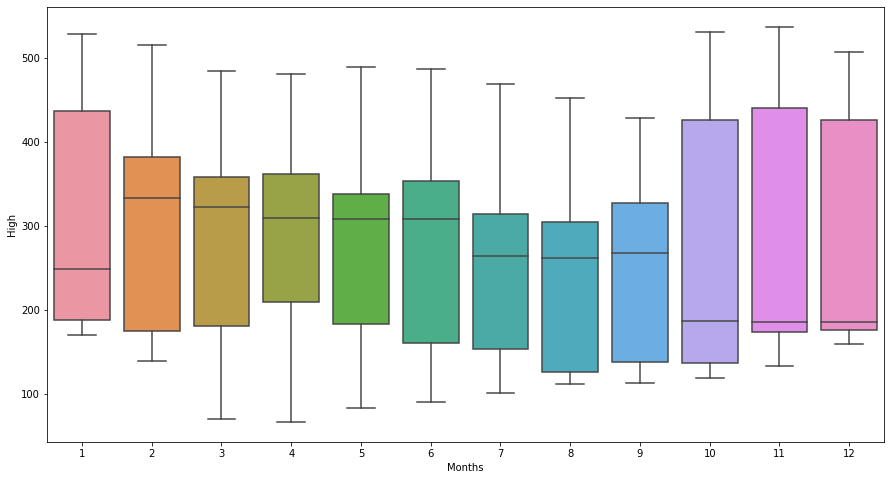

In [28]:
plt.figure(figsize= (15,8))
sns.boxplot(x = tatamotors_5year.Months, y = tatamotors_5year.High)

<a id = '5.6'></a>
## **<span style= 'color: #5494ff '>3.6 Histogram for Distribution on values</span>** 

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [29]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = tatamotors_5year.Open, name='Open'))
fig.add_trace(go.Histogram(x = tatamotors_5year.Low, name='Low'))
fig.add_trace(go.Histogram(x = tatamotors_5year.High, name= 'High'))
fig.update_layout(width = 1000, height = 600)
fig.show()

In [30]:
px.histogram(x = tatamotors_5year.Open)

<a id = '5.7'></a>
## **<span style= 'color: #5494ff '>3.7 Moving average line plot</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [31]:
tatamotors_5year['Moving_avg_2'] = tatamotors_5year.High.rolling(2).mean()
tatamotors_5year['Moving_avg_5'] = tatamotors_5year.High.rolling(5).mean()
tatamotors_5year['Moving_avg_10'] = tatamotors_5year.High.rolling(10).mean()

In [32]:
tatamotors_5year[['High', 'Moving_avg_2', 'Moving_avg_5']].head(5)

,High,Moving_avg_2,Moving_avg_5
Index,,,
2017-03-08,469.600006,NaN,NaN
2017-03-09,469.700012,469.650009,NaN
2017-03-10,471.850006,470.775009,NaN
2017-03-14,483.000000,477.425003,NaN
2017-03-15,476.549988,479.774994,474.140002


In [33]:
fig = px.line(data_frame=tatamotors_5year.iloc[:100,:], 
        x = tatamotors_5year.index[:100],
        y = ['High', 'Moving_avg_2', 'Moving_avg_5', 'Moving_avg_10'])
fig.update_layout(hovermode = 'x unified')

<a id = '5.8'></a>
## **<span style= 'color: #5494ff '>3.8 Differencing dataset<span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

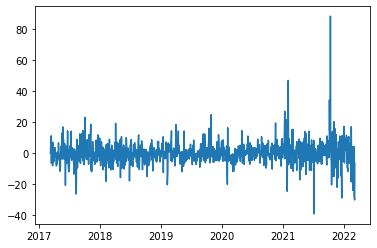

In [34]:
plt.plot(tatamotors_5year.High.diff(1))

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = tatamotors_5year.index, y = tatamotors_5year['High'].pct_change(1)))
# fig.add_trace(go.Line())
fig.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '6'></a>
# <span><center style="color:#5494ff"><strong>4. Dataset Creation for LSTM</strong></center></span>

In [36]:
tatamotors_5year.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name,Moving_avg_2,Moving_avg_5,Moving_avg_10
Index,,,,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday,NaN,NaN,NaN
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday,469.650009,NaN,NaN
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday,470.775009,NaN,NaN
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday,477.425003,NaN,NaN
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday,479.774994,474.140002,NaN


<h5 style = "color: #5494ff ;"><strong> Helper function to create Univariate and multivariate having Single and Multiple Timesteps dataset </strong></h5>

In [37]:
def Time_series_dataset(data, time_step, columns, target_colm, values_in_target = 1, dataframe = False):
    '''
    This function returns two arrays one dataset and other target dataset.
    target dataset can be singular or multiples 
    - data : dataframe object consists of feature and target_colm
    - time_step : window size for building dataset
    - columns : list of columns that will be used as features
    - target_colm : list of target_colm 
    - values_in_target : It is the no of values should be in target columns of dataset
    '''
    n = len(columns)
    for i in range(data.shape[0]-time_step-values_in_target):
        values = data[columns][i:time_step+i].to_numpy().reshape(-1,time_step,n)

        target_value = data[target_colm].iloc[time_step+i:time_step+i+values_in_target,:].to_numpy()
        target_value = target_value.reshape(-1, target_value.shape[0], target_value.shape[1])
        if i == 0:
            dataset = values
            target_values = target_value
        else:
            dataset = np.concatenate((dataset, values))
            target_values = np.concatenate((target_values, target_value))
    if columns == target_colm and len(columns) == 1 and dataframe is True:
        dataset = dataset.reshape(dataset.shape[0], -1)
        target_values = target_values.reshape(dataset.shape[0], -1)
        data = pd.DataFrame(dataset)
        data['target'] = target_values
        return data
    else:
        if len(target_colm)==1:
            target_values = target_values.reshape(target_values.shape[0], -1)
        return dataset, target_values

<a id = '6.1'></a>
## **<span style= 'color: #5494ff '>4.1 Open Value Univariate Dataset</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [38]:
open_value_dataset = Time_series_dataset(tatamotors_5year, TIME_STEPS, ['Open'], ['Open'], dataframe= True)
open_value_dataset.shape

(1185, 51)

In [39]:
open_value_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.00,432.25,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.25,436.50,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.50,442.00,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.00,439.00,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.00,446.00,451.450012,470.000000,470.000000,474.100006,482.500000


<a id = '6.2'></a>
## **<span style= 'color: #5494ff '>4.2 Volume Univariate Dataset</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [40]:
volume_dataset = Time_series_dataset(tatamotors_5year, TIME_STEPS, ['Volume'], ['Volume'], dataframe= True)

In [41]:
volume_dataset.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,target
0,5351597,3837624,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,...,5378402,4049649,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814
1,3837624,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,...,4049649,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795
2,5766815,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,...,3850940,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872
3,6348198,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,4417413,...,1885702,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872,7692869
4,4801312,6272947,6338248,2871104,4685410,4695648,8665384,4296510,4417413,2982614,...,3452072,6572678,6158546,4387481,6145914,10330814,27370795,15108872,7692869,4253044


<a id = '6.3'></a>
## **<span style= 'color: #5494ff '>4.3 Multistep Dataset Univariate and Multivariate</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<a id = '6.3.1'></a>
### **<span style= 'color: #5494ff '>4.3.1 Open Value Multistep Dataset</span>**

In [42]:
open_dataset_multi, open_target_multi = Time_series_dataset(tatamotors_5year, TIME_STEPS, ['Open']
        , ['Open'], values_in_target= PRED_TIME_STEPS)  # prediction PRED_TIME_STEPS IN future

In [43]:
open_dataset_multi.shape, open_target_multi.shape

((1176, 50, 1), (1176, 10))

<a id = '6.3.2'></a>
### **<span style= 'color: #5494ff '>4.3.2 Multivariate Multistep Dataset (Open and Volume)</span>**

In [44]:
open_vol_multistep_data, open_vol_multistep_target = Time_series_dataset(tatamotors_5year, TIME_STEPS, 
        ['Open', 'Volume'], ['Open', 'Volume'], values_in_target= PRED_TIME_STEPS)

In [45]:
open_vol_multistep_data.shape, open_vol_multistep_target.shape

((1176, 50, 2), (1176, 10, 2))

In [46]:
open_vol_multistep_target[0]

array([[4.51450012e+02, 1.03308140e+07],
       [4.70000000e+02, 2.73707950e+07],
       [4.70000000e+02, 1.51088720e+07],
       [4.74100006e+02, 7.69286900e+06],
       [4.82500000e+02, 4.25304400e+06],
       [4.82700012e+02, 3.10138000e+06],
       [4.82299988e+02, 5.39385600e+06],
       [4.76950012e+02, 3.00123200e+06],
       [4.80000000e+02, 4.31908000e+06],
       [4.78299988e+02, 2.46481900e+06]])

<a id = '6.4'></a>
## **<span style= 'color: #5494ff '>4.4 Multivariate Dataset</span>**

<a id = '6.4.1'></a>
### **<span style= 'color: #5494ff '>4.4.1 Multiple Input Series dataset</span>**

In [47]:
multi_input_data, multi_input_target = Time_series_dataset(tatamotors_5year,
     TIME_STEPS, columns=['Open', 'Volume'], target_colm= ['Open'])

In [48]:
multi_input_data.shape, multi_input_target.shape

((1185, 50, 2), (1185, 1))

In [49]:
combo_dataset_df = pd.DataFrame(multi_input_data[:,:,0])
combo_dataset_df['Y']= multi_input_target.reshape(-1, multi_input_target.shape[1])

In [50]:
combo_dataset_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Y
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.00,432.25,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.25,436.50,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.50,442.00,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.00,439.00,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.00,446.00,451.450012,470.000000,470.000000,474.100006,482.500000


<a id = '6.4.2'></a>
### **<span style= 'color: #5494ff '>4.4.2 Multiple parallel series dataset</span>**

In [51]:
multi_parallel_data, multi_parallel_target = Time_series_dataset(tatamotors_5year, TIME_STEPS, 
        ['Open', 'Volume'], target_colm=['Open', 'Volume'])

In [52]:
multi_parallel_target[:5]

array([[[4.51450012e+02, 1.03308140e+07]],

       [[4.70000000e+02, 2.73707950e+07]],

       [[4.70000000e+02, 1.51088720e+07]],

       [[4.74100006e+02, 7.69286900e+06]],

       [[4.82500000e+02, 4.25304400e+06]]])

In [53]:
multi_parallel_data.shape, multi_parallel_target.shape

((1185, 50, 2), (1185, 1, 2))

In [54]:
open_1 = pd.DataFrame(multi_parallel_data[:,:,0])
open_1['Target'] = multi_parallel_target[:,:,0]

volume_1 = pd.DataFrame(multi_parallel_data[:,:,1])
volume_1['Target'] = multi_parallel_target[:,:,1]

In [55]:
open_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,469.399994,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,...,427.799988,434.000000,429.649994,434.00,432.25,436.500000,442.000000,439.000000,446.000000,451.450012
1,462.450012,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,...,434.000000,429.649994,434.000000,432.25,436.50,442.000000,439.000000,446.000000,451.450012,470.000000
2,471.000000,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,...,429.649994,434.000000,432.250000,436.50,442.00,439.000000,446.000000,451.450012,470.000000,470.000000
3,481.000000,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,...,434.000000,432.250000,436.500000,442.00,439.00,446.000000,451.450012,470.000000,470.000000,474.100006
4,475.000000,478.700012,481.350006,476.549988,478.000000,469.950012,461.299988,470.750000,469.000000,467.500000,...,432.250000,436.500000,442.000000,439.00,446.00,451.450012,470.000000,470.000000,474.100006,482.500000


In [56]:
volume_1.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,Target
0,5351597.0,3837624.0,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,...,5378402.0,4049649.0,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0
1,3837624.0,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,...,4049649.0,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0
2,5766815.0,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,...,3850940.0,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0
3,6348198.0,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,4417413.0,...,1885702.0,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0,7692869.0
4,4801312.0,6272947.0,6338248.0,2871104.0,4685410.0,4695648.0,8665384.0,4296510.0,4417413.0,2982614.0,...,3452072.0,6572678.0,6158546.0,4387481.0,6145914.0,10330814.0,27370795.0,15108872.0,7692869.0,4253044.0


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '7'></a>
# <span><center style="color:#5494ff"><strong>5. Split into Train, Test and Validation dataset</strong></center></span>

In [57]:
def splitting_dataset(data, train_ratio = TRAIN_RATIO, valid_ratio = None, target_variable = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set
    - target_variable : If given data does not contain final column as target column then provide target array

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''
    if target_variable is None:
        if valid_ratio:
            x_train, x_test, y_train, y_test=train_test_split(data.iloc[:,:-1].to_numpy(), 
                data.iloc[:,-1].to_numpy(), train_size=(train_ratio+valid_ratio),
                random_state= RANDOM_SEED
            )
            
            valid_ratio = valid_ratio/(train_ratio + valid_ratio)

            x_train, x_val, y_train, y_val = train_test_split(
                x_train, y_train,
                test_size= valid_ratio, random_state= RANDOM_SEED
            )
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, x_test, y_train, y_test=train_test_split(data.iloc[:,:-1].to_numpy(), 
                data.iloc[:,-1].to_numpy(), train_size=train_ratio,
                random_state= RANDOM_SEED
            )

            return x_train, x_test, y_train, y_test

    else:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            x_train, x_test, y_train, y_test=train_test_split(data, 
                target_variable, train_size=(train_ratio+valid_ratio),
                random_state= RANDOM_SEED
            )

            valid_ratio = valid_ratio/(train_ratio + valid_ratio)

            x_train, x_val, y_train, y_val = train_test_split(
                x_train, y_train,
                test_size= valid_ratio, random_state= RANDOM_SEED
            )

            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, x_test, y_train, y_test=train_test_split(data, 
                target_variable, train_size=(train_ratio+valid_ratio),
                random_state= RANDOM_SEED
            )
            return x_train, x_test, y_train, y_test

In [58]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

def Splitting_dataset(data, train_ratio = train_ratio, valid_ratio = None, target_variable = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set
    - target_variable : If given data does not contain final column as target column then provide target array

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''
    if target_variable is None:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_val, y_val = data.iloc[training_rows:A, :-1].to_numpy(), data.iloc[training_rows:A, -1].to_numpy()
            x_test, y_test = data.iloc[A:,:-1].to_numpy(), data.iloc[A:,-1].to_numpy()
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_test, y_test = data.iloc[training_rows:, :-1].to_numpy(), data.iloc[training_rows:,-1].to_numpy()
            return x_train, x_test, y_train, y_test

    else:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_val, y_val = data[training_rows:A], target_variable[training_rows:A]
            x_test, y_test = data[A:], target_variable[A:]
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_test, y_test = data[training_rows:], target_variable[training_rows:]
            return x_train, x_test, y_train, y_test


def transformation_min_max(data, min, max):
    data = (data - min)/(max- min)
    return data

<a id = '7.1'></a>
## **<span style= 'color: #5494ff '>5.1 Dataset Having Single Target value</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

<a id = '7.1.1'></a>
### **<span style= 'color: #5494ff '>5.1.1 Dataset with single feature</span>**

In [59]:
x_train_mean, x_val_mean, x_test_mean, y_train_mean, y_val_mean, y_test_mean = splitting_dataset(
                open_value_dataset,valid_ratio= VALIDATION_RATIO)

In [60]:
x_train_mean.shape, x_test_mean.shape, x_val_mean.shape, y_train_mean.shape

((829, 50), (178, 50), (178, 50), (829,))

In [61]:
train_max = x_train_mean.max()
train_min = x_train_mean.min()

In [62]:
x_train_mean = transformation_min_max(x_train_mean, train_min, train_max)
x_test_mean = transformation_min_max(x_test_mean, train_min, train_max)
x_val_mean = transformation_min_max(x_val_mean, train_min, train_max)
y_train_mean = transformation_min_max(y_train_mean, train_min, train_max)
y_test_mean = transformation_min_max(y_test_mean, train_min, train_max)
y_val_mean = transformation_min_max(y_val_mean, train_min, train_max)

In [63]:
x_test_mean.shape

(178, 50)

In [64]:
x_train_mean = x_train_mean.reshape(x_train_mean.shape[0], x_train_mean.shape[1], 1)
x_val_mean = x_val_mean.reshape(x_val_mean.shape[0], x_val_mean.shape[1], 1)
x_test_mean = x_test_mean.reshape(x_test_mean.shape[0], x_test_mean.shape[1], 1)

In [65]:
x_train_mean.shape, y_train_mean.shape

((829, 50, 1), (829,))

In [66]:
x_train_mean[-1]

array([[0.40585007],
       [0.40219377],
       [0.40896868],
       [0.41025916],
       [0.39305301],
       [0.39165502],
       [0.38563286],
       [0.40262392],
       [0.42015271],
       [0.4416604 ],
       [0.43596087],
       [0.40972146],
       [0.40972146],
       [0.4198301 ],
       [0.41843205],
       [0.42112051],
       [0.41423809],
       [0.44069252],
       [0.43875684],
       [0.41832454],
       [0.43703626],
       [0.43671359],
       [0.45058607],
       [0.45327453],
       [0.4338101 ],
       [0.42692762],
       [0.42337886],
       [0.41133454],
       [0.40230132],
       [0.40552747],
       [0.39509623],
       [0.37530916],
       [0.37810517],
       [0.3619744 ],
       [0.34713408],
       [0.34089686],
       [0.35165071],
       [0.33874609],
       [0.33605763],
       [0.32541133],
       [0.29938702],
       [0.25701688],
       [0.24551025],
       [0.25690933],
       [0.25809226],
       [0.25529626],
       [0.26045812],
       [0.241

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '7.1.2'></a>
### **<span style= 'color: #5494ff '>5.1.2 Dataset with Multiple feature</span>**

In [67]:
x_train_comb, x_val_comb, x_test_comb, y_train_comb, y_val_comb, y_test_comb=splitting_dataset(
        multi_input_data, target_variable= multi_input_target, valid_ratio=VALIDATION_RATIO)

In [68]:
y_train_comb =y_train_comb.reshape(y_train_comb.shape[0], -1)
y_test_comb =y_test_comb.reshape(y_test_comb.shape[0], -1)
y_val_comb =y_val_comb.reshape(y_val_comb.shape[0], -1)

In [69]:
x_train_comb.shape, y_train_comb.shape, x_val_comb.shape, x_test_comb.shape

((829, 50, 2), (829, 1), (178, 50, 2), (178, 50, 2))

In [99]:
y_train_comb[:7]

array([[0.6973868 ],
       [0.95171521],
       [0.24551025],
       [0.45596299],
       [0.11151736],
       [0.21088289],
       [0.5731799 ]])

In [71]:
train_max_comb=x_train_comb.max(axis = (0,1))
train_min_comb = x_train_comb.min(axis = (0,1))

In [72]:
train_max_comb

array([5.31450012e+02, 3.90577839e+08])

In [73]:
x_train_comb = transformation_min_max(x_train_comb, train_min_comb, train_max_comb)
x_test_comb = transformation_min_max(x_test_comb, train_min_comb, train_max_comb)
x_val_comb = transformation_min_max(x_val_comb, train_min_comb, train_max_comb)

y_train_comb = transformation_min_max(y_train_comb, train_min_comb[0], train_max_comb[0])
y_test_comb = transformation_min_max(y_test_comb, train_min_comb[0], train_max_comb[0])
y_val_comb = transformation_min_max(y_val_comb, train_min_comb[0], train_max_comb[0])

In [74]:
x_train_comb.shape, y_train_comb.shape

((829, 50, 2), (829, 1))

<a id = '7.2'></a>
## **<span style= 'color: #5494ff '>5.2 Dataset with Multiple feature in target having single target values</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [75]:
x_train_comb_2, x_val_comb_2, x_test_comb_2, y_train_comb_2, y_val_comb_2, y_test_comb_2=splitting_dataset(
        multi_parallel_data, target_variable= multi_parallel_target, valid_ratio=VALIDATION_RATIO)

In [76]:
x_train_comb_2.shape, y_train_comb_2.shape, x_val_comb_2.shape, x_test_comb_2.shape

((829, 50, 2), (829, 1, 2), (178, 50, 2), (178, 50, 2))

In [77]:
train_max_comb_2=x_train_comb_2.max(axis = (0,1))
train_min_comb_2 = x_train_comb_2.min(axis = (0,1))

In [78]:
train_max_comb_2

array([5.31450012e+02, 3.90577839e+08])

In [79]:
x_train_comb_2 = transformation_min_max(x_train_comb_2, train_min_comb_2, train_max_comb_2)
x_test_comb_2 = transformation_min_max(x_test_comb_2, train_min_comb_2, train_max_comb_2)
x_val_comb_2 = transformation_min_max(x_val_comb_2, train_min_comb_2, train_max_comb_2)

y_train_comb_2 = transformation_min_max(y_train_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))
y_test_comb_2 = transformation_min_max(y_test_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))
y_val_comb_2 = transformation_min_max(y_val_comb_2, train_min_comb_2, train_max_comb_2).reshape((-1,2))

In [80]:
x_train_comb_2.shape, y_train_comb_2.shape

((829, 50, 2), (829, 2))

In [81]:
y_train_comb_2.max(axis = 0), x_test_comb_2.max(axis = 0)[0], x_train_comb_2.max(axis = (0,1))

(array([1., 1.]), array([0.94719859, 0.63910769]), array([1., 1.]))

<a id = '7.3'></a>
## **<span style= 'color: #5494ff '>5.3 Dataset with Single feature in target having Multi target values</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [82]:
x_train_multi, x_val_multi, x_test_multi, y_train_multi, y_val_multi, y_test_multi=splitting_dataset(
        open_dataset_multi, target_variable= open_target_multi, valid_ratio=VALIDATION_RATIO)

In [83]:
x_train_multi.shape, y_train_multi.shape, x_val_multi.shape, x_test_multi.shape

((822, 50, 1), (822, 10), (177, 50, 1), (177, 50, 1))

In [84]:
x_train_multi.max(axis = (0,1))

array([531.45001221])

In [85]:
train_min_multi = x_train_multi.min(axis = (0,1))
train_max_multi = x_train_multi.max(axis = (0,1))

In [86]:
x_train_multi = transformation_min_max(x_train_multi, train_min_multi, train_max_multi)
x_test_multi = transformation_min_max(x_test_multi, train_min_multi, train_max_multi)
x_val_multi = transformation_min_max(x_val_multi, train_min_multi, train_max_multi)

y_train_multi = transformation_min_max(y_train_multi, train_min_multi, train_max_multi)
y_test_multi = transformation_min_max(y_test_multi, train_min_multi, train_max_multi)
y_val_multi = transformation_min_max(y_val_multi, train_min_multi, train_max_multi)

In [87]:
x_train_multi.shape, y_train_multi.shape, 

((822, 50, 1), (822, 10))

In [88]:
x_train_multi.max(axis = (0,1)), x_test_multi.max(axis = (0,1)), y_train_multi.max()

(array([1.]), array([1.]), 1.0)

<a id = '7.4'></a>
## **<span style= 'color: #5494ff '>5.4 Dataset with Multiple feature in target having Multi target values</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [89]:
x_train_multi_target, x_val_multi_target, x_test_multi_target, y_train_multi_target, y_val_multi_target, y_test_multi_target=splitting_dataset(
        open_vol_multistep_data, target_variable= open_vol_multistep_target, valid_ratio=VALIDATION_RATIO)

In [90]:
x_train_multi_target.shape, y_train_multi_target.shape, x_val_multi_target.shape, x_test_multi_target.shape

((822, 50, 2), (822, 10, 2), (177, 50, 2), (177, 50, 2))

In [91]:
x_train_multi_target.max(axis = (0,1))

array([5.31450012e+02, 3.90577839e+08])

In [92]:
U = pd.DataFrame(x_train_multi_target[:,:,0])
V = pd.DataFrame(y_train_multi_target[:,:,0])
U.shape, V.shape

((822, 50), (822, 10))

In [93]:
pd.concat((U,V), axis = 1).iloc[:10,-20:]

,40,41,42,43,44,45,46,47,48,49,0,1,2,3,4,5,6,7,8,9
0,473.799988,480.750000,500.500000,505.000000,508.000000,508.600006,509.100006,503.799988,502.899994,498.000000,496.500000,506.700012,503.250000,487.000000,476.149994,504.000000,505.899994,498.000000,490.149994,480.549988
1,308.500000,325.000000,325.350006,323.000000,330.000000,331.100006,348.649994,339.000000,333.000000,331.750000,325.000000,319.500000,325.049988,320.000000,321.000000,318.600006,311.000000,303.500000,306.450012,305.000000
2,122.000000,121.800003,130.500000,140.100006,144.149994,144.500000,143.399994,144.300003,151.600006,147.899994,150.000000,149.449997,141.000000,142.800003,143.100006,147.199997,149.399994,149.199997,150.800003,148.699997
3,103.000000,105.250000,103.849998,105.400002,101.400002,101.750000,99.000000,100.750000,102.849998,105.000000,109.800003,109.500000,106.300003,106.699997,108.849998,106.900002,106.800003,103.949997,103.650002,106.349998
4,490.799988,486.000000,457.000000,466.549988,467.850006,479.399994,480.000000,480.100006,476.850006,484.500000,498.000000,487.750000,499.450012,491.950012,487.799988,495.000000,488.000000,459.899994,452.100006,458.149994
5,106.300003,106.699997,108.849998,106.900002,106.800003,103.949997,103.650002,106.349998,106.000000,108.500000,105.449997,104.699997,104.000000,102.300003,108.099998,106.400002,104.000000,103.000000,112.949997,112.400002
6,368.750000,355.149994,345.000000,350.799988,345.549988,345.000000,352.600006,351.000000,354.049988,352.049988,341.200012,335.500000,339.899994,338.500000,330.000000,328.799988,333.950012,331.500000,335.000000,338.399994
7,169.399994,172.449997,173.500000,170.600006,169.000000,169.000000,173.199997,176.100006,181.500000,183.649994,186.550003,180.300003,183.300003,186.000000,186.000000,185.649994,184.300003,181.500000,181.699997,180.000000
8,129.899994,123.900002,122.000000,120.650002,118.000000,112.650002,122.800003,120.250000,118.500000,119.300003,118.050003,122.599998,127.099998,127.300003,127.099998,139.000000,133.350006,130.449997,133.000000,132.000000
9,403.450012,402.500000,400.000000,395.500000,399.899994,392.000000,381.000000,363.000000,380.399994,379.899994,369.899994,373.399994,372.899994,379.799988,378.000000,373.700012,370.350006,372.500000,363.000000,360.100006


In [94]:
train_min_multi_target = x_train_multi_target.min(axis = (0,1))
train_max_multi_target = x_train_multi_target.max(axis = (0,1))

In [95]:
train_min_multi_target, train_max_multi_target

(array([6.650000e+01, 1.154721e+06]), array([5.31450012e+02, 3.90577839e+08]))

In [96]:
x_train_multi_target = transformation_min_max(x_train_multi_target, train_min_multi_target, train_max_multi_target)
x_test_multi_target = transformation_min_max(x_test_multi_target, train_min_multi_target, train_max_multi_target)
x_val_multi_target = transformation_min_max(x_val_multi_target, train_min_multi_target, train_max_multi_target)

y_train_multi_target = transformation_min_max(y_train_multi_target, train_min_multi_target, train_max_multi_target)
y_test_multi_target = transformation_min_max(y_test_multi_target, train_min_multi_target, train_max_multi_target)
y_val_multi_target = transformation_min_max(y_val_multi_target, train_min_multi_target, train_max_multi_target)

In [97]:
x_train_multi_target.shape, y_train_multi_target.shape, 

((822, 50, 2), (822, 10, 2))

In [98]:
(x_train_multi_target.max(axis = (0,1)), 
x_test_multi_target.max(axis = (0,1)), y_train_multi_target.max())

(array([1., 1.]), array([1., 1.]), 1.0)

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id = '8'></a>
# <span><center style="color:#5494ff"><strong>6. Model Building</strong></center></span>

<a id = "8.1"></a>
## **<span style = "color: #5494ff ;">6.1 Imports</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

In [100]:
import tensorflow as tf

from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

tf.random.set_seed(RANDOM_SEED)

In [101]:
MODEL_SAVE_PATH = './model_weights/'

In [102]:
tf.config.list_physical_devices()

2022-04-10 08:06:40.760550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 08:06:40.765296: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 08:06:40.765994: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [103]:
def Prediction_fun(data, model, no_predictions):
    '''
    This function return array of forecast values given data and model,
    forecasts no_prediction steps
    '''
    predictions = []
    last_steps = data[-1]
    last_values = last_steps.reshape(-1, last_steps.shape[0], last_steps.shape[1])
    for i in range(no_predictions):
        prediction = model.predict(last_values)
        predictions.extend(prediction.tolist())
        prediction = prediction.reshape(-1, prediction.shape[0], prediction.shape[1])
        last_values = np.concatenate((last_values[:,1:,:], prediction), axis = 1)
    return np.array(predictions)

def Reverse_transform(max, min, values):
    values = values*(max - min) + min
    return values


def Evaluate_model(model, x_test, y_test, transform_max=None, transform_min = None, 
        x_val = None, y_val = None, no_prediction=None):
    
    original_y_test = Reverse_transform(transform_max, transform_min, y_test)

    if transform_max is not None:
        if x_val is not None:
            original_y_val = Reverse_transform(transform_max ,transform_min, y_val)
            print("The Model errors on validation dataset before reverse_transform is: ")
            print(f'{model.evaluate(x_val, y_val, verbose= 0)}')
            val_pred = Reverse_transform(transform_max, transform_min, model.predict(x_val))
            print("The Model Absolute error on validation dataset after reverse_transform is: ")
            print(f"{mean_absolute_error(original_y_val, val_pred)}")
            print('-~'*40)
            
        print("The Model errors on test dataset before reverse_transform is: ")
        print(f'{model.evaluate(x_test, y_test, verbose= 0)}')
        test_pred = Reverse_transform(transform_max, transform_min, model.predict(x_test))
        print("The Model Absolute error on test dataset after reverse_transform is: ")
        print(f"{mean_absolute_error(original_y_test, test_pred)}")
        ax = plt.plot(original_y_test, label = 'Test')
        ax.append(plt.plot(test_pred, label = 'Test_prediction'))
        if no_prediction:
            plot_prediction(x_test, y_test, model, transform_max, transform_min, no_prediction)
        plt.title('Test dataset')
        plt.legend()
        plt.show()

def plot_prediction(time_series_data, target,  model, d_max, d_min , no_prediction= 10):
    prediction = Prediction_fun(time_series_data, model, no_prediction)
    prediction = Reverse_transform(d_max, d_min, prediction)
    A = np.empty_like(target)
    A.fill(None)
    A = np.concatenate((A, prediction.ravel()))
    target = Reverse_transform(d_max, d_min, target)
    # plt.plot(target)
    ax = plt.plot(A, label = 'Future')
    return A

<a id = "8.2"></a>
## **<span style = "color: #5494ff ;">6.2 Neural Model Building</span>**

<a href="#toc" role="button" aria-pressed="true" >⬆ Back to Table of Contents </a>

### **<span style = "color: #5494ff ;">6.2.1 Model 1 day_wise separate data</span>**

In [121]:
model = Sequential([
    LSTM(100, activation= 'relu', input_shape = (50,1)),
    Dense(1)
])

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanAbsoluteError(), metrics= [tf.keras.losses.MAE])

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


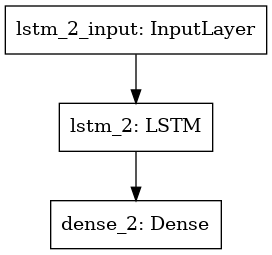

In [123]:
plot_model(model)

In [124]:
x_train_mean.shape

(829, 50, 1)

In [125]:
x_train_mean.shape

(829, 50, 1)

In [126]:
model.fit(x_train_mean, y_train_mean, epochs= 1, validation_data= (x_val_mean, y_val_mean))

26/26 [==============================] - 3s 93ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554


In [127]:
len(model.get_weights())

5

In [128]:
for a in model.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_2/lstm_cell_2/kernel:0
Weights shape is (1, 400)
Layer name is lstm_2/lstm_cell_2/recurrent_kernel:0
Weights shape is (100, 400)
Layer name is lstm_2/lstm_cell_2/bias:0
Weights shape is (400,)
Layer name is dense_2/kernel:0
Weights shape is (100, 1)
Layer name is dense_2/bias:0
Weights shape is (1,)


The Model errors on validation dataset before reverse_transform is: 
[0.055400826036930084, 0.055400826036930084]
The Model Absolute error on validation dataset after reverse_transform is: 
25.75861637244064
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
The Model errors on test dataset before reverse_transform is: 
[0.060164932161569595, 0.060164932161569595]
The Model Absolute error on test dataset after reverse_transform is: 
27.973685961091117


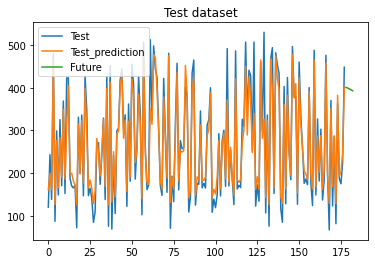

In [129]:
Evaluate_model(model, x_test_mean, y_test_mean, train_max, train_min, x_val_mean, y_val_mean, 5)

In [130]:
model.predict(x_test_mean).shape

(178, 1)

### **<span style = "color: #5494ff ;">6.2.2 Model 1 day_wise combo data</span>**

In [131]:
model_combo = Sequential([
    LSTM(50,input_shape = (50,2)),
    Dense(1)
])

model_combo.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [132]:
model_combo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                10600     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 10,651
Trainable params: 10,651
Non-trainable params: 0
_________________________________________________________________


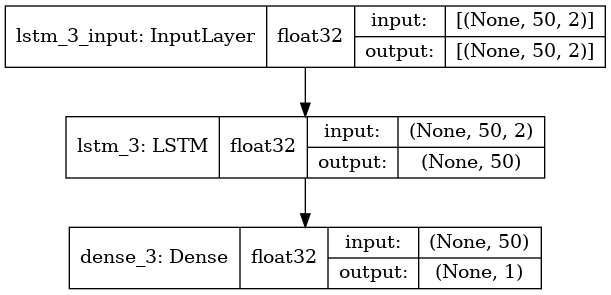

In [133]:
plot_model(model_combo, show_shapes=True, show_dtype= True)

In [134]:
model_combo.fit(x_train_comb, y_train_comb, epochs= 10, 
    validation_data= (x_val_comb, y_val_comb))

Epoch 1/10
26/26 [==============================] - 2s 28ms/step - loss: 1.5025 - mean_absolute_error: 0.4968 - val_loss: 0.0602 - val_mean_absolute_error: 0.2199
Epoch 2/10
26/26 [==============================] - 0s 11ms/step - loss: 0.0356 - mean_absolute_error: 0.1559 - val_loss: 0.0111 - val_mean_absolute_error: 0.0903
Epoch 3/10
26/26 [==============================] - 0s 11ms/step - loss: 0.0032 - mean_absolute_error: 0.0416 - val_loss: 0.0014 - val_mean_absolute_error: 0.0273
Epoch 4/10
26/26 [==============================] - 0s 10ms/step - loss: 6.6494e-04 - mean_absolute_error: 0.0188 - val_loss: 4.0723e-04 - val_mean_absolute_error: 0.0147
Epoch 5/10
26/26 [==============================] - 0s 9ms/step - loss: 3.0573e-04 - mean_absolute_error: 0.0127 - val_loss: 3.1485e-04 - val_mean_absolute_error: 0.0134
Epoch 6/10
26/26 [==============================] - 0s 6ms/step - loss: 2.9732e-04 - mean_absolute_error: 0.0128 - val_loss: 3.4191e-04 - val_mean_absolute_error: 0.0143


In [135]:
model_combo.evaluate(x_val_comb, y_val_comb)

6/6 [==============================] - 0s 3ms/step - loss: 3.1904e-04 - mean_absolute_error: 0.0135


[0.0003190352290403098, 0.01346604060381651]

In [136]:
model_combo.evaluate(x_test_comb, y_test_comb)

6/6 [==============================] - 0s 3ms/step - loss: 4.6322e-04 - mean_absolute_error: 0.0142


[0.00046321595436893404, 0.01421449426561594]

In [137]:
model_combo.predict(x_test_comb).shape

(178, 1)

In [138]:
x_test_comb.shape

(178, 50, 2)

The Model errors on validation dataset before reverse_transform is: 
[0.0003190352290403098, 0.01346604060381651]
The Model Absolute error on validation dataset after reverse_transform is: 
6.150217892078868
-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~
The Model errors on test dataset before reverse_transform is: 
[0.00046321595436893404, 0.01421449426561594]
The Model Absolute error on test dataset after reverse_transform is: 
6.5173848184307


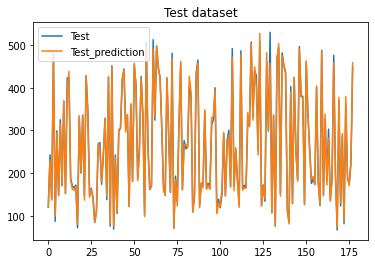

In [139]:
Evaluate_model(model_combo, x_test_comb, y_test_comb, 
    train_max_comb[0], train_min_comb[0], x_val_comb, y_val_comb)

In [140]:
y_pred_comb = model_combo.predict(x_val_comb)

In [141]:
y_pred_test = model_combo.predict(x_test_comb)

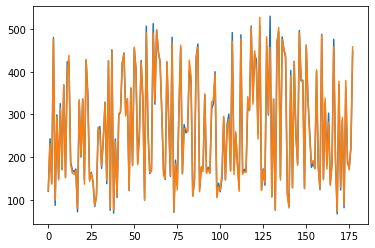

In [142]:
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_test_comb))
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_pred_test))

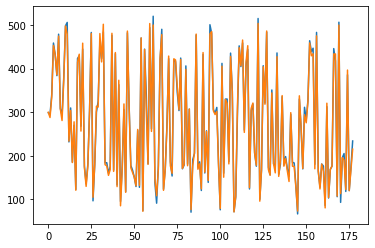

In [143]:
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_val_comb))
plt.plot(Reverse_transform(train_max_comb[0], train_min_comb[0], y_pred_comb))

In [144]:
len(model_combo.get_weights())

5

In [145]:
for a in model_combo.weights:
    print(f'{bl_}Layer name is {b_}{a.name}')
    print(f'{bl_}Weights shape is {b_}{a.shape}')

Layer name is lstm_3/lstm_cell_3/kernel:0
Weights shape is (2, 200)
Layer name is lstm_3/lstm_cell_3/recurrent_kernel:0
Weights shape is (50, 200)
Layer name is lstm_3/lstm_cell_3/bias:0
Weights shape is (200,)
Layer name is dense_3/kernel:0
Weights shape is (50, 1)
Layer name is dense_3/bias:0
Weights shape is (1,)


### **<span style = "color: #5494ff ;">6.2.3 Model 2 day_wise</span>**

In [146]:
model_1 = Sequential([
    LSTM(50,activation = 'relu', input_shape = (50,1), return_sequences= True),
    layers.Dropout(0.3),
    LSTM(50, activation = 'relu', return_sequences= True),
    LSTM(50, activation = 'relu', return_sequences= False),
    Dense(1)
])

model_1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [147]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 50, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 50)            20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


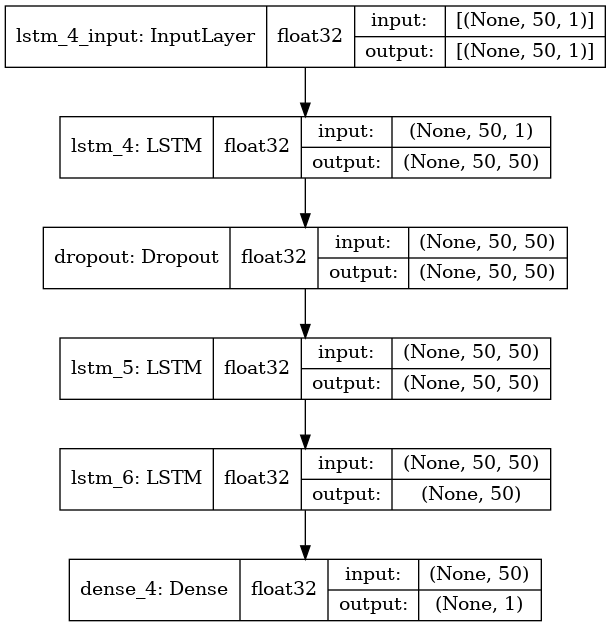

In [148]:
plot_model(model_1, show_shapes=True, show_dtype= True)

In [149]:
x_train_mean.shape

(829, 50, 1)

In [150]:
model_1.fit(x_train_mean, y_train_mean, epochs= 1, 
    validation_data= (x_val_mean, y_val_mean))

26/26 [==============================] - 10s 286ms/step - loss: 0.0542 - mean_absolute_error: 0.1639 - val_loss: 0.0096 - val_mean_absolute_error: 0.0813


In [ ]:
model_1.evaluate(x_val_mean, y_val_mean)

In [ ]:
model_1.evaluate(x_test_mean, y_test_mean)

In [ ]:
plt.plot(model_1.predict(x_test_mean))
plt.plot(y_test_mean)

In [ ]:
plt.plot(model_1.predict(x_val_mean))
plt.plot(y_val_mean)

In [ ]:
Evaluate_model(model_1, x_test_mean, y_test_mean, train_max, train_min, no_prediction= 20)

### **<span style = "color: #5494ff ;">6.2.4 Model 2 day_wise combo</span>**

In [ ]:
tf.random.set_seed(RANDOM_SEED)
model_combo_2 = Sequential([
    LSTM(50,input_shape = (50,2)),
    Dense(2)
])

model_combo_2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_combo_2.summary()

In [ ]:
plot_model(model_combo_2, show_shapes=True, show_dtype= True)

In [ ]:
model_combo_2.fit(x_train_comb_2, y_train_comb_2, epochs= 10, 
    validation_data= [x_val_comb_2, y_val_comb_2])

In [ ]:
y_pred = model_combo_2.predict(x_test_comb_2)
y_pred.shape

In [ ]:
y_price = y_pred[:,0]
y_vol = y_pred[:,1]

In [ ]:
plt.plot(y_price)
plt.plot(y_test_comb_2[:,:,0])
plt.plot(y_vol)
plt.plot(y_test_comb_2[:,:,1])

In [ ]:
Evaluate_model(model_combo_2, x_test_comb_2, y_test_comb_2, train_max_comb_2, train_min_comb_2)

### **<span style = "color: #5494ff ;">6.2.5 Model 2 day_wise combo bidirections</span>**

In [ ]:
model_combo_2_bi = Sequential([
    layers.Bidirectional(LSTM(50, 
        kernel_regularizer= tf.keras.regularizers.L2(0.1)), 
        input_shape = (50,2)),
    Dense(2)
])

model_combo_2_bi.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_combo_2_bi.summary()

In [ ]:
plot_model(model_combo_2_bi, show_shapes=True, show_dtype= True)

In [ ]:
model_combo_2_bi.fit(x_train_comb_2, y_train_comb_2, epochs= 25, 
    validation_data= [x_val_comb_2, y_val_comb_2])

In [ ]:
model_combo_2_bi.save_weights(MODEL_SAVE_PATH + 'model_combo_bidir.h5')

In [ ]:
model_combo_2_bi.save(MODEL_SAVE_PATH + 'model_combo_whole.h5')

In [ ]:
y_pred = model_combo_2_bi.predict(x_test_comb_2)

In [ ]:
y_pred.shape

In [ ]:
y_test_comb_2.shape

In [ ]:
y_test_comb_2[:,0]

In [ ]:
y_price = y_pred[:,0]
y_vol = y_pred[:,1]

In [ ]:
plt.plot(y_price)
plt.plot(y_test_comb_2[:,0])

In [ ]:
forecast = Prediction_fun(x_test_comb_2, model_combo_2_bi, 30)

In [ ]:
forecast_price = forecast[:,0]
forecast_vol = forecast[:,1]
forecast_price.shape, forecast_vol.shape

In [ ]:
A = np.empty_like(y_test_comb_2[:,0])

In [ ]:
A = np.empty_like(y_test_comb_2[:,0])
A.fill(None)
forecast_price_1 = np.concatenate((A, forecast_price))

In [ ]:
plt.plot(y_test_comb_2[:,0])
plt.plot(forecast_price_1)
plt.title('Price')

In [ ]:
forecast_vol_1 = np.concatenate((A, forecast_vol))

In [ ]:
plt.plot(y_test_comb_2[:,1])
plt.plot(forecast_vol_1)

### **<span style = "color: #5494ff ;">6.2.6 Model with dataset having Single feature & multiple values in target</span>**

In [ ]:
x_train_multi.shape

In [ ]:
model_multi_open = Sequential([
    LSTM(70,input_shape = (70,1), kernel_regularizer= tf.keras.regularizers.L2(0.1)),
    Dense(10)
])

model_multi_open.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

In [ ]:
model_multi_open.summary()

In [ ]:
plot_model(model_multi_open, show_shapes=True, show_dtype= True)

In [ ]:
model_multi_open.fit(x_train_multi, y_train_multi, epochs= 50, 
    validation_data= [x_val_multi, y_val_multi])

In [ ]:
Evaluate_model(model_multi_open, x_test_multi, y_test_multi, 
    train_max_multi, train_min_multi, x_val_multi, y_val_multi)

In [ ]:
x_test_multi.shape

In [ ]:
y_test_multi.shape

In [ ]:
forecast_data = np.hstack((x_test_multi.reshape(x_test_multi.shape[0],-1), y_test_multi ))
forecast_data.shape

In [ ]:
forecast_data = forecast_data[-1, -70:]
forecast_data.shape

In [ ]:
x_test_multi.shape

In [ ]:
forecast_data=forecast_data.reshape(-1, forecast_data.shape[0])

In [ ]:
forecast_value = model_multi_open.predict(forecast_data)

In [ ]:
forecast_value

In [ ]:
forecast_value=Reverse_transform(train_max_multi, train_min_multi, forecast_value )

In [ ]:
forecast_value

In [ ]:
T = np.empty_like(y_test_multi[:,9])
T.fill(None)

In [ ]:
T = np.concatenate((T, forecast_value.ravel()))

In [ ]:
T

In [ ]:
y_test_multi[:,9].shape

In [ ]:
Y = Reverse_transform(train_max_multi, train_min_multi, y_test_multi[:,9])

In [ ]:
Y

In [ ]:
plt.plot(Y)
plt.plot(T)

### **<span style = "color: #5494ff ;">6.2.7 Model with dataset having Multiple feature & multiple values in target</span>**

In [ ]:
x_train_multi_target.shape, y_train_multi_target.shape

In [ ]:
RANDOM_SEED

In [ ]:
tf.random.set_seed(RANDOM_SEED)

inputs = tf.keras.Input(shape = (80,2))
x = LSTM(80, input_shape = (80,2), return_sequences= True )(inputs)
x = layers.Bidirectional(LSTM(80, return_sequences = True))(x)
x = layers.Bidirectional(LSTM(80))(x)


y = Dense(50, activation= 'relu')(x)
z = Dense(50, activation = 'relu')(x)
price_output = Dense(10, name = 'price_output')(y)
volume_output = Dense(10, name = 'volume_output')(z)

model_multi_target = Model(inputs = inputs, outputs = [price_output, volume_output])

In [ ]:
model_multi_target.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

tensor_board = TensorBoard('./logs/')

In [ ]:
model_multi_target.summary()

In [ ]:
plot_model(model_multi_target, show_shapes=True, show_dtype= True)

In [ ]:
y_train_multi_target[0,:,0]

In [ ]:
model_multi_target.fit(x_train_multi_target, (y_train_multi_target[:,:,0], y_train_multi_target[:,:,1]), epochs= 50, 
    validation_data= [x_val_multi_target, (y_val_multi_target[:,:,0], y_val_multi_target[:,:,1] )],
    callbacks = [tensor_board])

In [ ]:
MODEL_SAVE_PATH

In [ ]:
model_multi_target.save_weights(MODEL_SAVE_PATH+'/model_multi_target.h5')

In [ ]:
model_multi_target.save(MODEL_SAVE_PATH+'/model_multi_target_whole.h5')

In [ ]:
model_multi_target.save_spec()

In [ ]:
y_test_multi_target.shape


In [ ]:
model_multi_target.evaluate(x_test_multi_target, y=[y_test_multi_target[:,:,0], y_test_multi_target[:,:,1]])

In [ ]:
x_test_multi_target[-1].shape

In [ ]:
price_predict, volume_predict = model_multi_target.predict(x_test_multi_target[-1].reshape(-1, 80,2))

In [ ]:
train_max_multi_target

In [ ]:
price_predict=Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], price_predict.ravel())
volume_predict = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], volume_predict.ravel())

In [ ]:
y_test_multi_target[-1][:,0]

In [ ]:
price_actual = Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], y_test_multi_target[-1][:,0])
volume_actual = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], y_test_multi_target[-1][:,1])

In [ ]:
volume_actual, price_actual

In [ ]:
x_test_multi_target[-1,:,0]

In [ ]:
plt.plot(price_predict)
plt.plot(price_actual)

### 6.2.8 Model 3 day_wise separate

In [ ]:
x_train_mean.shape, y_train_mean.shape

In [ ]:
model_3 = Sequential([
    layers.Bidirectional(LSTM(50, recurrent_regularizer= tf.keras.regularizers.L2(0.1), 
                input_shape = (50,1), return_sequences= True)),
    layers.Bidirectional(LSTM(50, recurrent_regularizer= tf.keras.regularizers.L2(0.1), 
                input_shape = (50,1), return_sequences= True)),
    GRU(50),
    Dense(25, activation = 'relu'),
    Dense(1)
])

model_3.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = ['mae']
)

In [ ]:
model_3.summary()

In [ ]:
plot_model(model_3, show_shapes= True, show_layer_names = True)

In [ ]:
model_3.fit(x_train_mean, y_train_mean, epochs = 1,
    validation_data = [x_val_mean, y_val_mean])

In [ ]:
model_3.save_weights(MODEL_SAVE_PATH + 'trail/for_deployment'  )

In [ ]:
model_3.save(MODEL_SAVE_PATH + 'for_deployment_whole')

In [ ]:
model_3.evaluate(x_test_mean, y_test_mean)

In [ ]:
y_test_pred = model_3.predict(x_test_mean)

In [ ]:
plt.plot(y_test_pred)
plt.plot(y_test_mean)

In [ ]:
forecasting = Prediction_fun(x_test_mean, model_3, 50)
forecasting = Reverse_transform(train_max, train_min, forecasting)

In [ ]:
forecasting=plot_prediction(x_test_mean, y_test_mean, model_3, train_max, train_min, 10)
x =Reverse_transform(train_max, train_min, y_test_mean)
plt.plot(x)

In [ ]:
forecasting

In [ ]:
# px.line(y = forecasting)
fig = go.Figure()
fig.add_trace(go.Scatter(y = forecasting))
fig.add_trace(go.Scatter(y= x))